<a href="https://colab.research.google.com/github/mja628/magnetic-reconnection/blob/main/spaceapps_magnetic_reconnection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upgrade to pandas 2 for `date_format` kwarg in `read_csv()`

In [3]:
!pip install pandas --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.


In [4]:
!pip install geopack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 784.7 kB/s eta 0:00:00


In [1]:
import numpy as np
import pylab as pl
import pandas as pd

from time import sleep
from ftplib import FTP_TLS

from geopack import geopack
from geopack import t96

Load IGRF coefficients ...


In [2]:
assert int(pd.__version__[0]) >= 2

## DST

### NOAA
there was an attempt to get DST indices from NOAA but their file format was too deranged to comprehend and we found it in the low-res OMNI data anyway

In [ ]:
pd.to_datetime('2012-42', format='%Y-%j')

Timestamp('2012-02-11 00:00:00')

In [ ]:
from ftplib import FTP
dst_dir = 'ftp://ftp.ngdc.noaa.gov/STP/GEOMAGNETIC_DATA/INDICES/DST/'

session = FTP('ftp.ngdc.noaa.gov')
session.login()
session.cwd('STP/GEOMAGNETIC_DATA/INDICES/DST/')
s = session.nlst()
dst_urls = [dst_dir + f for f in session.nlst() if f[:3] == 'dst' and f[-3:] == 'txt']
session.quit()

'221 Goodbye.'

### low-res Omni

In [3]:
dst_df = pd.read_csv('https://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/omni2_all_years.dat',
                     delim_whitespace=True, parse_dates={'datetime':[0,1,2]}, date_format='%Y %j %H',
                     usecols=(0,1,2,40), names={'Year':0, 'Decimal Day':1, 'Hour':2, 'DST':40}).replace(99999,np.nan)
dst_df.set_index('datetime', inplace=True)
dst_df

,DST
datetime,
1963-01-01 00:00:00,-6.0
1963-01-01 01:00:00,-5.0
1963-01-01 02:00:00,-5.0
1963-01-01 03:00:00,-3.0
1963-01-01 04:00:00,-3.0
...,...
2023-12-31 19:00:00,NaN
2023-12-31 20:00:00,NaN
2023-12-31 21:00:00,NaN


## Omni


In [4]:
session = FTP_TLS('spdf.gsfc.nasa.gov')
session.login()
session.cwd('pub/data/omni/high_res_omni/')

omni_dir = 'https://spdf.gsfc.nasa.gov/pub/data/omni/high_res_omni/'
omni_urls = [omni_dir + f[0] for f in session.mlsd() if f[0][:8] == 'omni_min']

session.quit()

'221 Goodbye.'

In [5]:
omni_urls.sort()
len(omni_urls)

43

### you could download five or six files, or... *just one*

In [ ]:
dframe = pd.read_csv(omni_urls[0], delim_whitespace=True, parse_dates={'datetime':[0,1,2,3]}, date_format='%Y %j %H %M',
                     usecols=[0, 1, 2, 3, 14, 17, 18, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33],
                      names=['Year','Day','Hour','Minute', 'Bx,GSM', 'By,GSM', 'Bz,GSM', 'Flow Speed',
                             'Vx,GSE', 'Vy,GSE', 'Vz,GSE', 'Proton Density', 'Flow Pressure',
                             'Electric Field', 'Plasma Beta', 'Alfven Mach Number', 'x,GSE', 'y,GSE', 'z,GSE'])

dframe

,datetime,Minute,"Bx,GSM","By,GSM","Bz,GSM",Flow Speed,"Vx,GSE","Vy,GSE","Vz,GSE",Proton Density,Flow Pressure,Electric Field,Plasma Beta,Alfven Mach Number,"x,GSE","y,GSE","z,GSE"
0,2005 1 0,0,-6.61,2.14,-0.22,412.4,-411.3,0.2,30.2,5.09,1.73,0.09,1.27,6.7,231.43,-39.66,19.35
1,2005 1 0,5,-6.70,1.90,-0.11,411.4,-410.4,3.7,29.3,4.97,1.68,0.04,1.22,6.6,231.42,-39.66,19.35
2,2005 1 0,10,-6.75,2.05,-0.27,409.7,-408.7,3.8,28.6,4.72,1.58,0.11,1.11,6.3,231.42,-39.66,19.35
3,2005 1 0,15,-6.47,2.13,-0.69,412.7,-411.5,5.5,31.1,4.86,1.66,0.29,1.24,6.6,231.42,-39.66,19.35
4,2005 1 0,20,-6.01,2.59,-0.89,416.5,-414.8,6.8,34.4,4.83,1.68,0.37,1.31,6.7,231.42,-39.66,19.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2005 365 23,35,2.05,-6.75,-1.29,456.9,-456.0,7.9,27.3,2.59,1.08,0.59,0.28,5.1,226.30,-39.03,20.00
105116,2005 365 23,40,2.06,-6.78,-1.14,457.5,-456.6,6.6,27.5,2.98,1.25,0.53,0.32,5.5,226.30,-39.02,20.01
105117,2005 365 23,45,2.05,-6.83,-1.09,457.4,-456.5,8.0,27.7,2.68,1.12,0.47,0.29,5.2,226.30,-39.02,20.01
105118,2005 365 23,50,1.55,-6.91,-1.38,457.7,-456.8,8.1,28.1,2.49,1.04,0.63,0.27,5.0,226.30,-39.02,20.01


### DOWNLOAD EVERYTHING

In [6]:
omni = []
for url in omni_urls:
  omni.append(pd.read_csv(url, delim_whitespace=True, parse_dates={'datetime':[0,1,2,3]},date_format='%Y %j %H %M',
                          usecols=[0, 1, 2, 3, 14, 17, 18, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33],
                          names=['Year','Day','Hour','Minute', 'Bx,GSM', 'By,GSM', 'Bz,GSM', 'Flow Speed',
                                 'Vx,GSE', 'Vy,GSE', 'Vz,GSE', 'Proton Density', 'Flow Pressure',
                                 'Electric Field', 'Plasma Beta', 'Alfven Mach Number',
                                 'x,GSE', 'y,GSE', 'z,GSE']))
  #sleep(0.5)  # wait time not needed because loading each file takes long enough that avail connections not saturated
  print('\b'*10, url[63:67])

print("\nDone loading Omni data")

 1981
 1982
 1983
 1984
 1985
 1986
 1987
 1988
 1989
 1990
 1991
 1992
 1993
 1994
 1995
 1996
 1997
 1998
 1999
 2000
 2001
 2002
 2003
 2004
 2005
 2006
 2007
 2008
 2009
 2010
 2011
 2012
 2013
 2014
 2015
 2016
 2017
 2018
 2019
 2020
 2021
 2022
 2023

Done loading Omni data


In [7]:
omni_df = pd.concat(omni, ignore_index=True).set_index('datetime').sort_index()  # condense all omni data in one df
omni_df.replace([99.99, 999.9, 999.99, 9999.99, 99999.9], np.nan, inplace=True)  # set all fill values to nan
omni_df['DST'] = dst_df.reindex(index=omni_df.index, method='pad')['DST']        # add DST column
omni_df                                                                          # display result

,"Bx,GSM","By,GSM","Bz,GSM",Flow Speed,"Vx,GSE","Vy,GSE","Vz,GSE",Proton Density,Flow Pressure,Electric Field,Plasma Beta,Alfven Mach Number,"x,GSE","y,GSE","z,GSE",DST
datetime,,,,,,,,,,,,,,,,
1981-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
1981-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
1981-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
1981-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
1981-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-31 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-31 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


download more RAM with this one simple trick:

In [8]:
del omni

### big plot

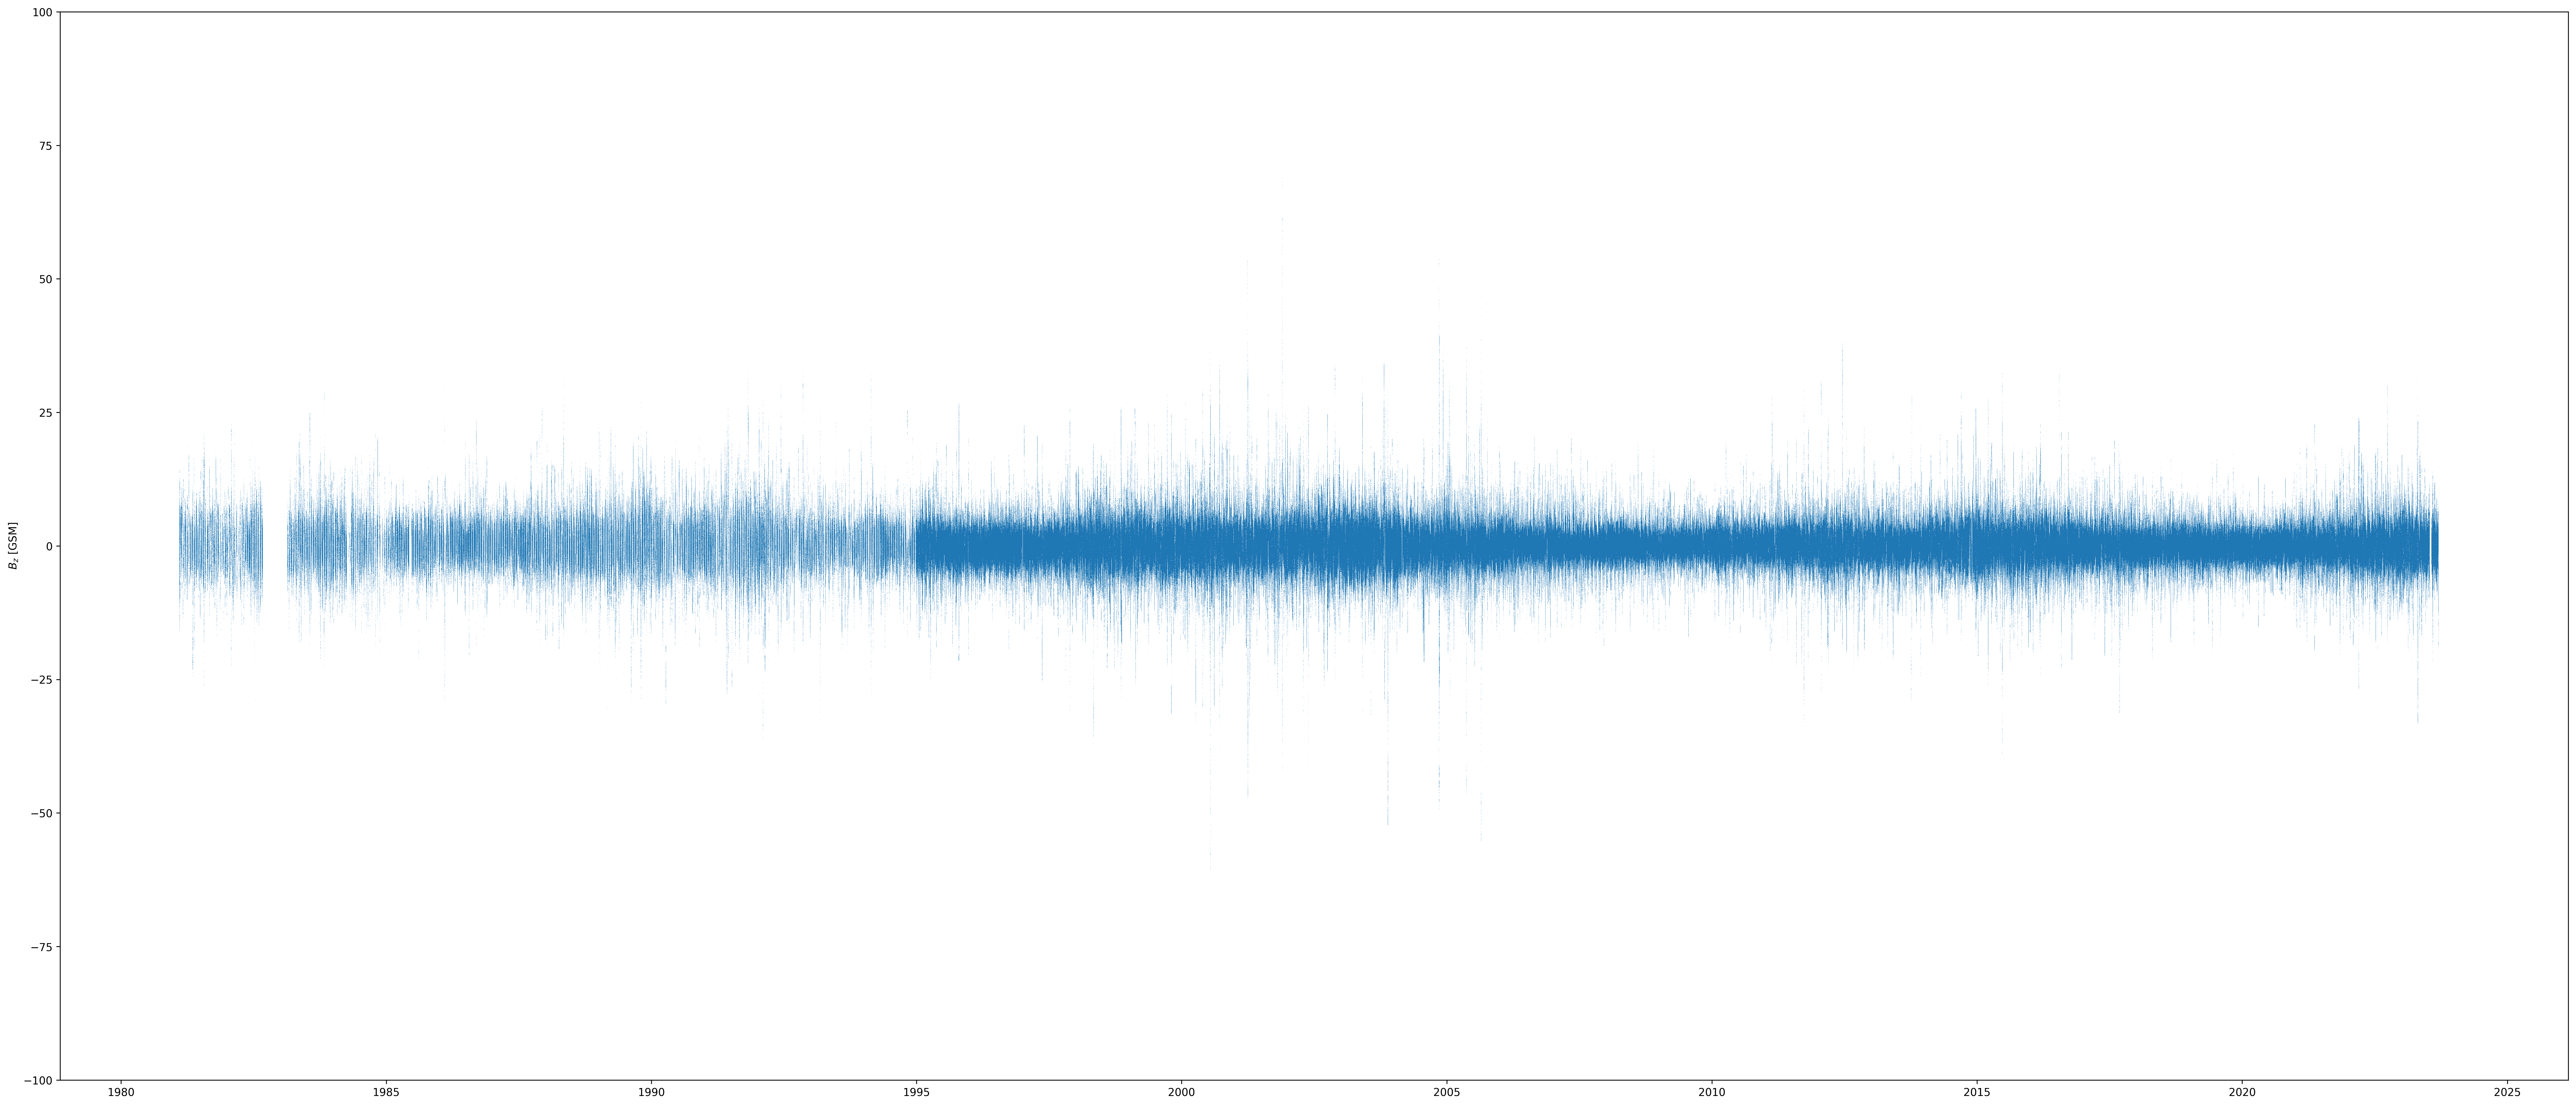

In [ ]:
pl.figure(figsize=(42,18), dpi=300)
pl.plot(omni_df.index, omni_df['Bz,GSM'], ',')
pl.ylabel('$B_z$ [GSM]')
pl.ylim(-100, 100)
pl.savefig('omni_bz_plot.png')
pl.show()

In [ ]:
omni_df

,"Bx,GSM","By,GSM","Bz,GSM",Flow Speed,"Vx,GSE","Vy,GSE","Vz,GSE",Proton Density,Flow Pressure,Electric Field,Plasma Beta,Alfven Mach Number,"x,GSE","y,GSE","z,GSE",DST
datetime,,,,,,,,,,,,,,,,
1981-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
1981-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
1981-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
1981-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
1981-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:55:00,-4.28,3.02,0.74,569.6,-569.2,2.4,-17.4,2.67,1.73,-0.42,0.77,8.4,250.16,54.77,11.48,-18.0
2022-12-31 23:56:00,-3.90,3.58,-0.01,573.9,-573.3,-6.7,-23.9,2.48,1.63,0.01,0.68,8.1,250.16,54.77,11.48,-18.0
2022-12-31 23:57:00,-3.14,3.93,0.48,586.3,-586.1,-9.7,-2.1,2.64,1.81,-0.28,0.77,8.5,250.16,54.73,11.48,-18.0


## Wind
getting a list of Wind files from the SPDF FTP server

In [ ]:
session = FTP_TLS('spdf.gsfc.nasa.gov')
session.login()
session.cwd('pub/data/wind/mfi/ascii/1hour_ascii/')

wind_dir = 'https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/ascii/1hour_ascii/'
wind_urls = [wind_dir + f[0] for f in session.mlsd() if f[0][-3:] == 'asc']

session.quit()

'221 Goodbye.'

In [ ]:
# bad datetime data in this file, so we're just gonna throw it out
wind_urls.remove('https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/ascii/1hour_ascii/201706_wind_mag_1hour.asc')

In [ ]:
len(wind_urls)

346

reading in all wind data

In [ ]:
from time import sleep

wind = []
for url in wind_urls:
  wind.append(pd.read_csv(url, delim_whitespace=True, parse_dates={'datetime':[0,1,2,3,4]},date_format='%Y %m %d %H %M',
                  names=['Year','Month','Day','Hour','Min','Bx,GSE','By,GSE','Bz,GSE','By,GSM','Bz,GSM','Bt',
                          'RMS,Bx,GSE','RMS,By,GSM','RMS,Bz,GSM','RMS,Bt','number_fts_pts','Rx,GSE','Ry,GSE',
                          'Rz,GSE','Ry,GSM','Rz,GSM']))
  sleep(0.5)  # adding a little wait time between loops to avoid maxing out available connections
  print('\b'*10, url[63:69])

print("\nDone loading Wind data")

 200904
 200306
 200607
 200512
 202008
 199902
 201906
 201605
 201510
 201304
 201011
 199601
 201804
 201707
 201412
 201206
 199703
 202302
 200806
 200204
 200111
 200705
 200410
 202106
 201808
 200501
 199911
 201503
 200208
 199612
 201002
 200709
 199507
 200908
 201401
 199710
 200102
 201609
 200403
 201308
 202004
 202010
 202305
 200801
 201009
 200702
 201508
 200203
 201803
 199807
 199704
 201201
 199411
 201901
 199905


In [ ]:
wind_df = pd.concat(wind, ignore_index=True).set_index('datetime').sort_index().replace(-1e31,np.nan)
wind_df

,"Bx,GSE","By,GSE","Bz,GSE","By,GSM","Bz,GSM",Bt,"RMS,Bx,GSE","RMS,By,GSM","RMS,Bz,GSM","RMS,Bt",number_fts_pts,"Rx,GSE","Ry,GSE","Rz,GSE","Ry,GSM","Rz,GSM"
datetime,,,,,,,,,,,,,,,,
1994-11-12 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
1994-11-12 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
1994-11-12 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
1994-11-12 03:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
1994-11-12 04:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-12 19:30:00,-3.642,10.085,-6.173,7.876,-8.816,12.476,0.685,1.218,1.050,0.643,38653,209.018,-91.757,-3.583,-88.881,23.053
2023-09-12 20:30:00,-0.358,11.985,-4.113,10.492,-7.093,12.997,2.173,0.952,1.709,0.385,38709,208.987,-91.680,-3.600,-89.448,20.417
2023-09-12 21:30:00,0.987,11.778,-4.170,10.418,-6.896,12.780,1.363,1.125,1.826,0.459,39017,208.955,-91.603,-3.617,-89.756,18.654


In [ ]:
wind_df['2022-01-12 12:02':'2022-11-12 04:05']

,"Bx,GSE","By,GSE","Bz,GSE","By,GSM","Bz,GSM",Bt,"RMS,Bx,GSE","RMS,By,GSM","RMS,Bz,GSM","RMS,Bt",number_fts_pts,"Rx,GSE","Ry,GSE","Rz,GSE","Ry,GSM","Rz,GSM"
datetime,,,,,,,,,,,,,,,,
2022-01-12 12:30:00,6.328,1.566,1.887,1.563,1.891,6.862,0.253,0.806,0.567,0.074,38962,252.214,46.938,11.994,46.920,12.060
2022-01-12 13:30:00,2.508,-4.461,0.983,-4.479,0.836,7.024,2.708,3.725,1.185,0.575,37686,252.241,46.800,12.002,46.461,13.249
2022-01-12 14:30:00,1.737,-6.889,0.835,-6.933,0.423,7.256,0.868,0.395,0.721,0.204,38962,252.266,46.665,12.009,45.857,14.788
2022-01-12 15:30:00,2.395,-6.109,1.014,-6.166,0.395,6.989,0.912,0.931,1.805,0.158,39127,252.292,46.529,12.017,45.096,16.593
2022-01-12 16:30:00,2.453,-5.279,0.650,-5.348,-0.102,6.831,1.143,1.252,3.033,0.183,38845,252.318,46.392,12.025,44.190,18.537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-11 23:30:00,2.845,-8.342,1.106,-8.195,1.928,10.555,3.735,2.213,4.103,1.802,38624,198.981,72.783,-6.651,71.770,-13.809
2022-11-12 00:30:00,0.407,-1.811,-2.758,-2.080,-2.531,8.014,3.412,4.295,5.649,2.944,39122,199.003,72.887,-6.636,71.672,-14.817
2022-11-12 01:30:00,4.495,-7.377,5.729,-6.515,6.691,11.321,2.205,2.435,3.199,0.525,39118,199.025,72.991,-6.621,71.372,-16.649


quick plot of $B_z$ over time

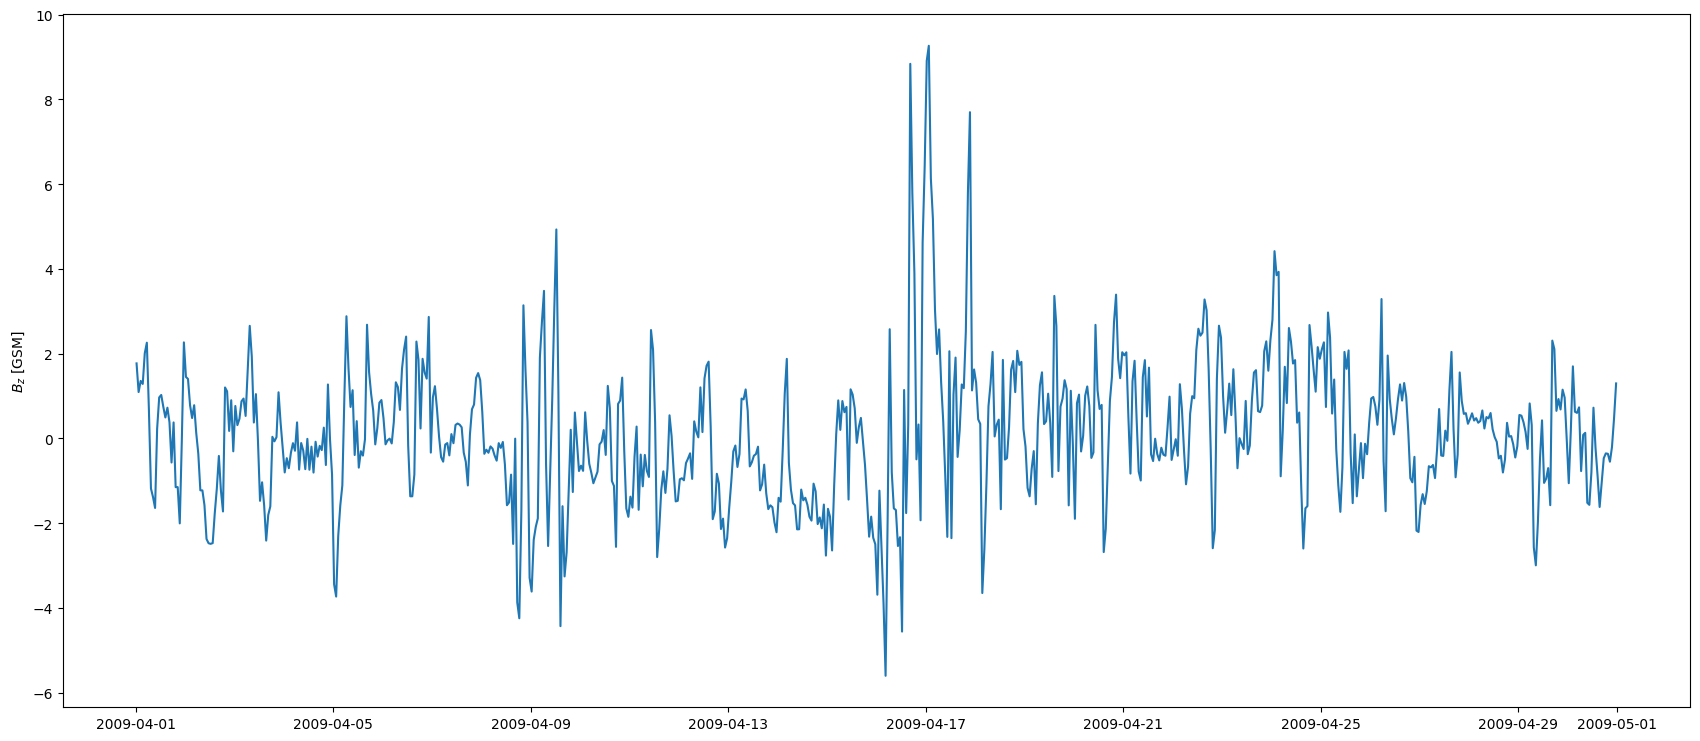

In [ ]:
pl.figure(figsize=(21,9))
pl.plot(df['datetime'], df['Bz,GSM'])
pl.ylabel('$B_z$ [GSM]')
pl.show()

big plot of $B_z$ over entire time range

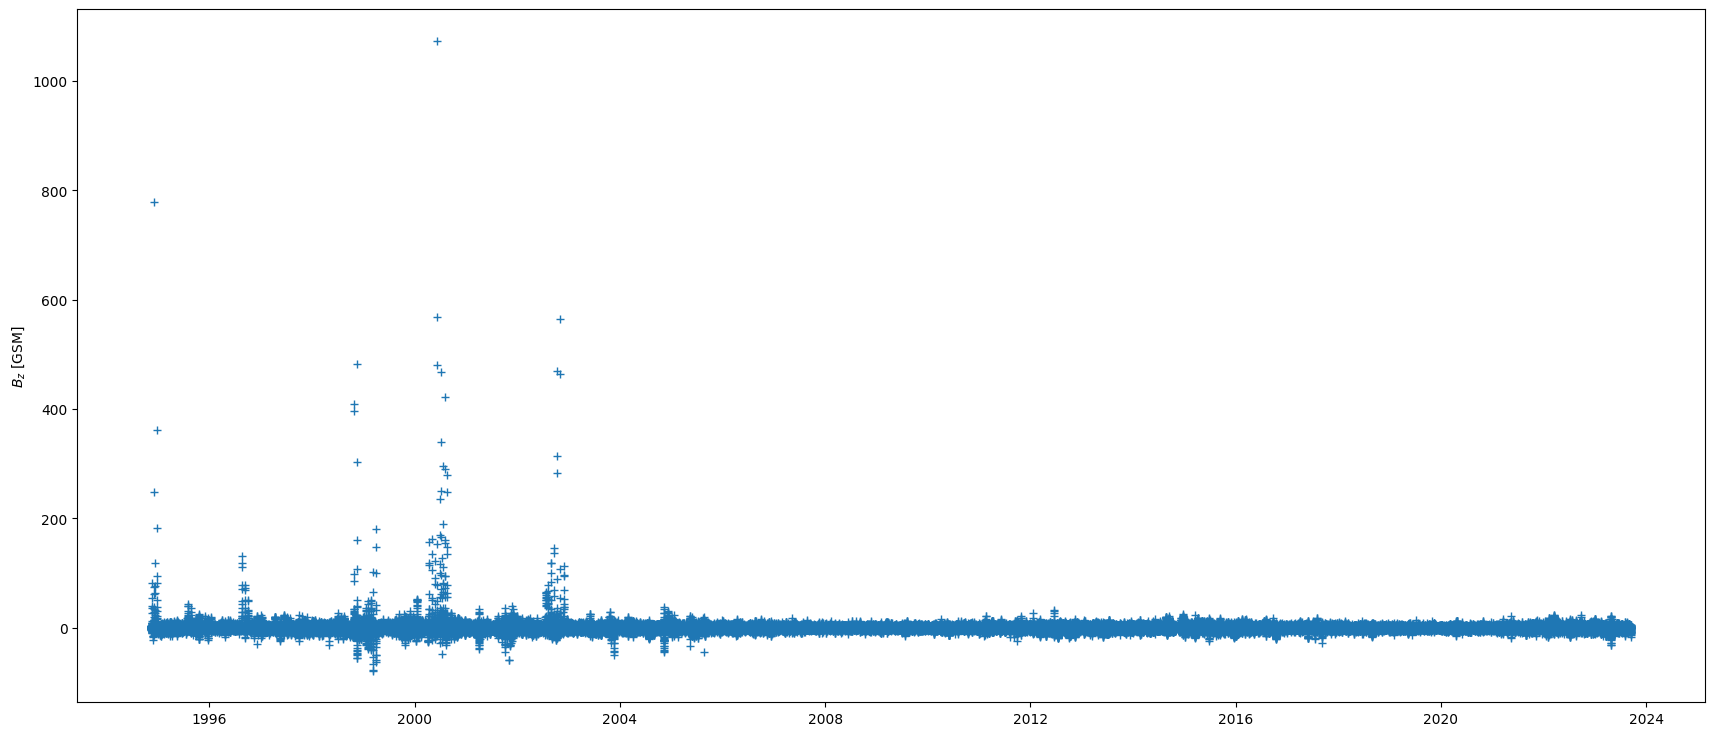

In [ ]:
pl.figure(figsize=(21,9))
pl.plot(wind_df.index, wind_df['Bz,GSM'], '+')
pl.ylabel('$B_z$ [GSM]')
pl.show()

In [ ]:
!pip install geopack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 4.8 MB/s eta 0:00:00


## Modeling

In [ ]:
from geopack import geopack

Load IGRF coefficients ...


The converter does not work!
reached maximum loop ...


<ipython-input-127-6ecdc2f3b873>:105: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not(y_north[0] == df['Ry,GSM'][0]):


TypeError: ignored

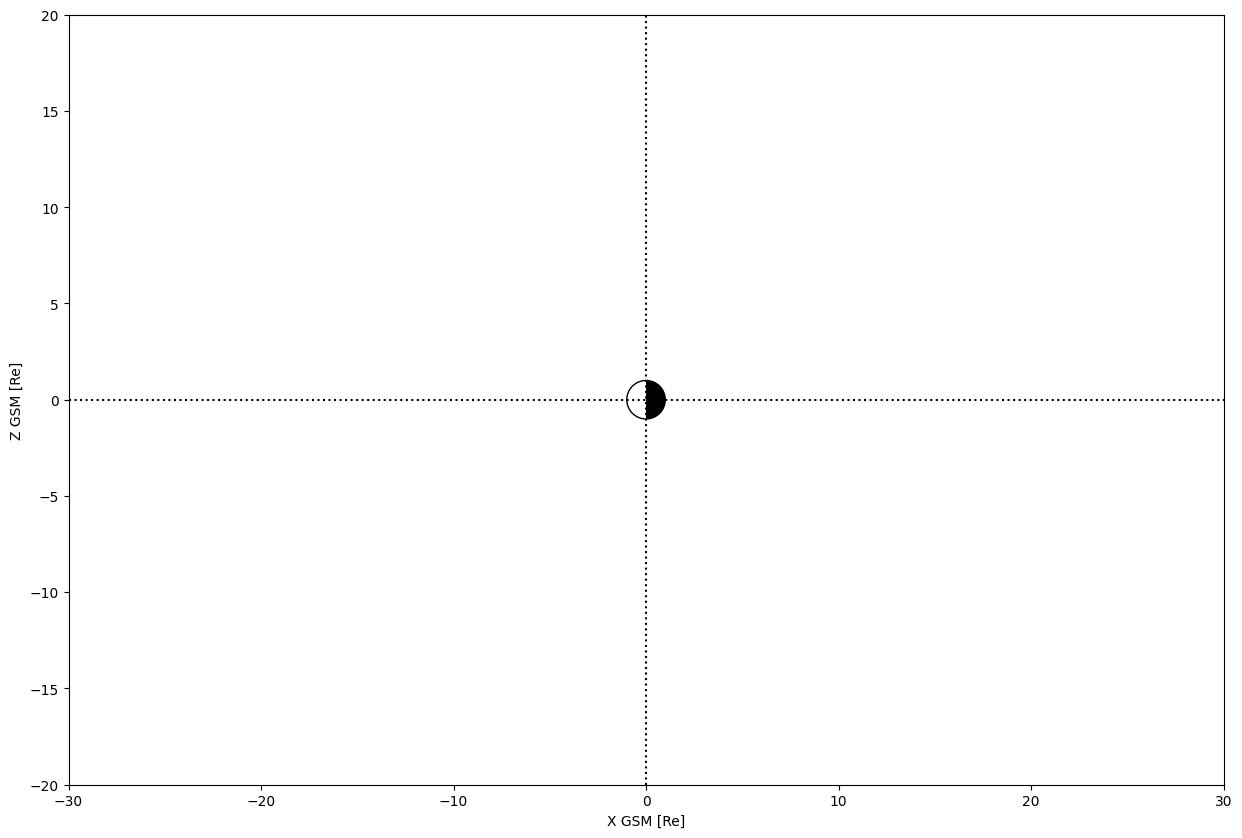

In [ ]:
from matplotlib.pylab import place
from matplotlib.patches import Wedge, Circle
ut = 0
ps = geopack.recalc(ut)
def dual_half_circle(center=(0,0), radius=1, angle=270, ax=None, colors=('w','k','k'),
                     **kwargs):
    """
    Add two half circles to the axes *ax* (or the current axes) with the
    specified facecolors *colors* rotated at *angle* (in degrees).
    """
    if ax is None:
        ax = pl.gca()
    theta1, theta2 = angle, angle + 180
    #w1 = Wedge(center, radius, theta1, theta2, fc=colors[0], **kwargs)
    #w2 = Wedge(center, radius, theta2, theta1, fc=colors[1], **kwargs)

    w1 = Wedge(center, radius, theta1, theta2, fc=colors[1], **kwargs)
    w2 = Wedge(center, radius, theta2, theta1, fc=colors[0], **kwargs)

    cr = Circle(center, radius, fc=colors[2], fill=False, **kwargs)
    for wedge in [w1, w2, cr]:
        ax.add_artist(wedge)
    return [w1, w2, cr]



def setup_fig(xlim=(-30,30),ylim=(-20,20),xlabel='X GSM [Re]',ylabel='Z GSM [Re]'):

    fig = pl.figure(figsize=(15,10))
    ax  = fig.add_subplot(111)
    ax.axvline(0,ls=':',color='k')
    ax.axhline(0,ls=':',color='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.set_aspect('equal')
    w1,w2,cr = dual_half_circle(ax=ax)

    return ax



def generate_random_points_on_hemisphere(hemisphere='north', num_points=1):
    """
    Generate random points on the northern or southern hemisphere of a unit sphere.

    Parameters:
    - hemisphere: 'north' or 'south'
    - num_points: number of random points to generate

    Returns:
    - x, y, z coordinates of the random points
    """
    x_coords = []
    y_coords = []
    z_coords = []

    for _ in range(num_points):
        phi = 2 * np.pi * np.random.rand()  # azimuthal angle
        if hemisphere == 'north':
            theta = np.pi / 2 * np.random.rand()  # polar angle
        else:
            theta = np.pi / 2 + np.pi / 2 * np.random.rand()  # polar angle

        # Convert spherical coordinates to Cartesian coordinates
        x = np.sin(theta) * np.cos(phi)
        y = np.sin(theta) * np.sin(phi)
        z = np.cos(theta)

        x_coords.append(x)
        y_coords.append(y)
        z_coords.append(z)

    return x_coords, y_coords, z_coords



def trace_and_plot(df, num_points=5):
  """
  Example
  bxgsm,bygsm,bzgsm = t96(par, ps, xgsm,ygsm,zgsm)

  Input
  ps: Dipole tilt angle in radian.
  xgsm,ygsm,zgsm: The given position in cartesian GSM coordinate in Re (earth radii, 1 Re = 6371.2 km).
  par: A model paramter. It is a 10-element array, whose elements are (1-10)
  | par |  1   |  2  |     3-4     |   5-10   |
  | Var | Pdyn | Dst | ByIMF,BzIMF | not used |
  where Pdyn is the solar wind dynamic pressure in nPa; Dst is the Dst index in nT; ByImf,BzImf are the y and z components of the IMF (interplanetary magnetif field) in GSM.
  """

  # Generate random points on both hemispheres
  # x_north, y_north, z_north = generate_random_points_on_hemisphere('north', num_points)
  x_south, y_south, z_south = generate_random_points_on_hemisphere('south', num_points)

  # Use the coordinates from the given data
  # x_north, y_north, z_north = geopack.gsmgse(df['Rx,GSE'], df['Ry,GSE'], df['Rz,GSE'], -1) # takes the coordinates in units of Re already ##FIX-ME
  x_north = df['Rx,GSE']
  y_north = df['Ry,GSM']
  z_north = df['Rz,GSM']
  By = df['By,GSM']
  Bz = df['Bz,GSM']
  if not(y_north[0] == df['Ry,GSM'][0]):
    print('The converter does not work!')


  ax = setup_fig()

  # Trace and plot field lines for northern hemisphere points
  for x_gsm, y_gsm, z_gsm, By_gsm, Bz_gsm in zip(x_north, y_north, z_north, By, Bz):
    if np.sqrt(x_gsm**2 + y_gsm**2 + z_gsm**2) <1:
      print("you fool, you're inside the earth")
    Pdyn = 1000
    Dst = 2
    par = np.array([Pdyn, Dst, By_gsm, Bz_gsm, 0, 0, 0, 0, 0, 0 ])

    x, y, z, xx, yy, zz = geopack.trace(x_gsm, y_gsm, z_gsm, dir=1,
                                        rlim=10000, r0=.99999, exname='t96',
                                        inname='igrf', maxloop=10000, parmod=par)

  ax.plot(xx, zz, color='blue')  # Using blue for northern hemisphere

  # # Trace and plot field lines for southern hemisphere points
  # for x_gsm, y_gsm, z_gsm in zip(x_south, y_south, z_south):
  #     x, y, z, xx, yy, zz = geopack.trace(x_gsm, y_gsm, z_gsm, dir=-1, rlim=1000, r0=.99999, parmod=2, exname='t89', inname='igrf', maxloop=10000)
  #     ax.plot(xx, zz, color='red')  # Using red for southern hemisphere

  pl.show()



# Call the function to trace and plot for a given number of points
trace_and_plot(wind_df, num_points=5)

Dynamic pressure:
$P_\mathrm{dyn} = m_i n_\mathrm{sw} \mathbf{u}^2_\mathrm{sw}$

## test

In [ ]:
t96([1, 2, 3, 4, 0, 0, 0, 0, 0, 0], 1.2, 5.234, 5.234, 5.234)

TypingError: ignored

In [ ]:
%%timeit
t96([1, 2, 3, 4, 0, 0, 0, 0, 0, 0], 1.2, 5.234, 5.234, 5.234)

2.12 ms ± 407 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## optimizing calculate_ThetaShear

In [24]:

def calculate_ThetaShear(df, StartLoc=(5, 0, 0), Resolution=10):
  """
  Calculates the internal and external magnetic fields at around specified origin for a given IMF dataframe
  using the t96 model by Tsyganenko. Uses the magnetic fields to calculate the shear angle for
  a square range of locations 10 Re on either side of the origin.

  Parameters:
   - df - pandas dataframe of the collected magnetic field data from NASA probes
   - StartLoc - a tuple of the origin coordinates of the simulation
   - Resolution - the dimensionality of the theta_shear array, inversely proportional to the width of each spatial step

   Returns:
    - IMFCA - IMF clock angle
    - theta_shearArr - an array of theta_shear angles at a range of locations around the origin
  """
  # create arrays to be added to the initial position to span a larger area
  spatial_extent = 20 # earth radii
  Ex = 0.5*spatial_extent
  Dy = np.linspace(-Ex, Ex, Resolution)
  Dz = np.linspace(-Ex, Ex, Resolution)

  # empty array with same index as input
  theta_shear = np.zeros((df.index.size, Resolution, Resolution))

  # calculate the clock angle of the interplanetary magnetic field
  IMFCA = np.arctan2(df['By,GSM'], df['Bz,GSM'])

  # origin coordinates
  x = StartLoc[0]
  y = StartLoc[1]
  z = StartLoc[2]

  # represent time index as unix timestamps
  UT = df.index.astype(int) // int(10e9)

  data = zip(np.arange(test_df.index.size), df['Flow Pressure'], df['By,GSM'], df['Bz,GSM'],
             df['Vx,GSE'], df['Vy,GSE'], df['Vz,GSE'], df['DST'], UT)

  for t, pdyn, by, bz, vx, vy, vz, dst, ut in data:
    ps = geopack.recalc(ut, vx, vy, vz)
    par = np.array([pdyn, dst, by, bz, 0, 0, 0, 0, 0, 0])

    # calculate the external and internal magnetic fields around the coordinate origin
    for iz, dz in enumerate(Dz):
      for iy, dy in enumerate(Dy):
        pos = (x, y+dy, z+dz)
        theta_shear[t, iy, iz] = compute_shear(par, ps, pos)

  return IMFCA, theta_shear



def compute_shear(par, ps, position):
  """
  returns theta in degrees
  """
  dBe = geopack.t96.t96(par, ps, *position)
  dBi = geopack.dip(*position)

  costheta = np.clip(np.dot(dBe, dBi) / (np.linalg.norm(dBi) * np.linalg.norm(dBe)), -1.0, 1.0)
  return np.degrees(np.arccos(costheta))

In [28]:
StartDate = '2002-06-18 22:25'
EndDate = '2002-06-18 23:55'

imfca, theta = calculate_ThetaShear(omni_df[StartDate : EndDate], Resolution=80)

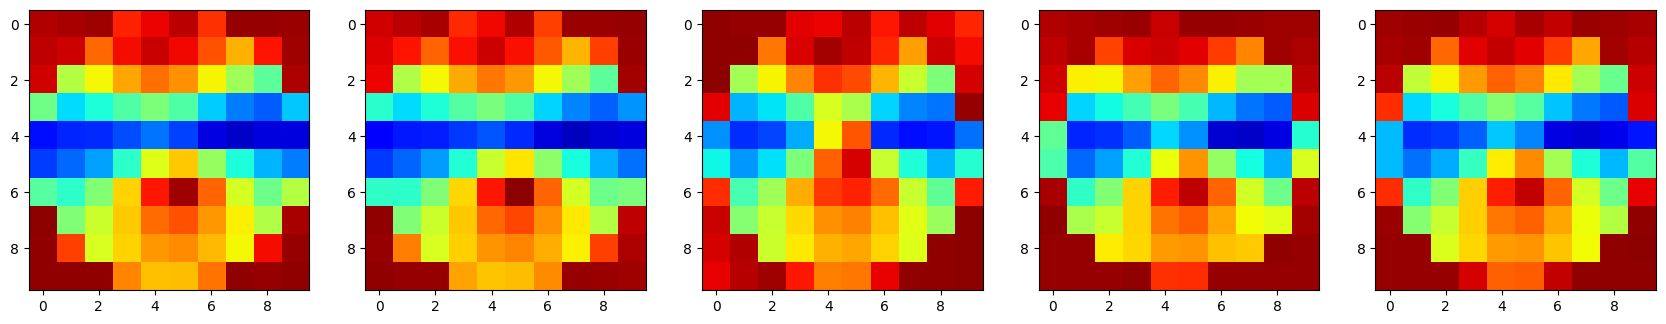

In [44]:
pl.subplots(1,5, figsize=(21,9))

for i, data in enumerate(theta[0:50:10]):
  pl.subplot(1,5,i+1)
  pl.imshow(data.T, cmap='jet', vmin=0, vmax=180)
pl.show()

In [12]:
test_df = omni_df['2015-01-01 00:00:00':'2015-01-01 02:00:00']

np.arctan2(test_df['By,GSM'], test_df['Bz,GSM'])

datetime
2015-01-01 00:00:00   -0.934877
2015-01-01 00:01:00   -1.201074
2015-01-01 00:02:00   -1.308542
2015-01-01 00:03:00   -1.297507
2015-01-01 00:04:00         NaN
                         ...   
2015-01-01 01:56:00   -2.381830
2015-01-01 01:57:00   -2.315894
2015-01-01 01:58:00   -2.243829
2015-01-01 01:59:00   -2.222890
2015-01-01 02:00:00   -2.208034
Length: 121, dtype: float64

In [23]:
pos = (1, 2, 3)
print(*pos, sep='\n')

1
2
3


In [101]:
test_df.index.size

121

In [16]:
np.arange(test_df.index.size)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120])

In [13]:
UT = test_df.index.astype(int) // int(10e9)
ps = geopack.recalc(UT)
par = [test_df['Flow Pressure'], test_df['DST'], test_df['By,GSM'], test_df['Bz,GSM'], 0, 0, 0, 0, 0, 0]
par

ValueError: ignored